Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./catapult_histogram.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

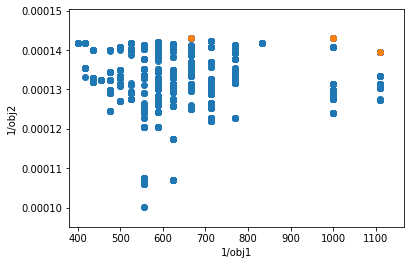

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.00042893909064912377


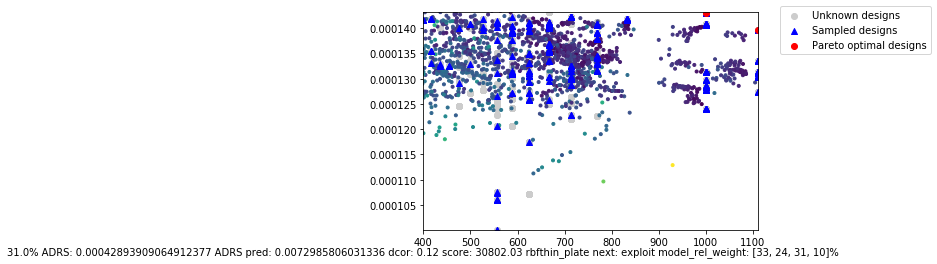

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1769,  803,  805,  801,  791, 1530,   98,  597,  101,  100,  489,
       1622,  211,    4,    6, 1580, 1590, 1523, 1493, 1591,  635, 1579,
         89,  307, 1619,   91,   90, 1586, 1489,   96, 1883, 1147,  202,
       1478,  193, 1252, 1576, 1472,  531, 1439, 1429,  212,  641, 1506,
        174,  309, 1366, 1571,  651, 1589, 1048, 1152, 1141, 1158, 1040,
        403,  938, 1044, 1146,   83,  518,  627,  736,  541, 1134, 1119,
        848, 1053,  951,  842,  299, 1857, 1902, 1800, 1052, 1049, 1777,
       1502, 1588, 1154, 1389, 1549, 1934, 1479, 1032, 1568, 1509, 1827,
         75,   95, 1897, 1563, 1535, 1485,  442,  209,    3, 1837, 1584,
       1935, 1801, 1621, 1655, 1382, 1620, 1245,  540, 1654, 1358, 1547,
       1680, 1729, 1778, 1559, 1275, 1139,  844, 1578, 1730, 1922,   16,
        527, 1581, 1799,  318, 1797, 1492, 1840,  637,  835,  746, 1653,
       1828,  420, 1648,  833,  953, 1616,  749,   88, 1148, 1465, 1144,
       1452,  405,   74,  116,  742,  631,    2,  6